# Summary

- 1. Data processing
- 2. Data cleaning
- 3. Exploratory analysis and plots of relevant attributes
- 4. Feature selection
- 5. Models comparison

# 1. Data processing

1) bookID: A unique identification number for each book. 

2) title: The name under which the book was published. 


3) authors: The names of the authors of the book. Multiple authors are delimited by “/”. 

4) average_rating: The average rating of the book received in total. 

5) isbn: Another unique number to identify the book, known as the International Standard Book Number.

6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN. 

7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English. 

8) num_pages: The number of pages the book contains.

9) ratings_count: The total number of ratings the book received. 

10) text_reviews_count: The total number of written text reviews the book received. 

11) publication_date: The date the book was published.

12) publisher: The name of the book publisher. 

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
# Loading CSV data in DataFrame
# Using warn parameter to see the issues
Books = pd.read_csv('books.csv', encoding='UTF-8', on_bad_lines='warn')

# Show the first 5 rows of the DataFrame to check
Books.head(5)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


4 lines are missing! They are skipped by the reader.

Try reading dates

In [300]:
# Changing date type from string to python date format
try:
    temp = Books.publication_date
    df_processed = Books.drop(columns=["publication_date"])
    df_processed = pd.concat([df_processed,pd.to_numeric(pd.to_datetime(temp, format='%m/%d/%Y'))],axis=1)
except:
  print("Date format error")

Date format error


# 2. Data cleaning

## File cleaning

In [301]:
# Loading the new CSV file books2.csv after manual repair of the errors in DataFrame (cf report)
data = pd.read_csv('books2.csv', encoding='UTF-8', on_bad_lines='warn')

# Show the first 5 rows of the DataFrame to check
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


There is no more remaining warning.

## Null testing

In [302]:
# Test null values
data.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

There are no invalid values in the dataframe. It is clean.

## Dropping outliers

In [303]:
def finding_outliers(data_outliers, variable_name):
  iqr = data_outliers[variable_name].quantile(0.75) - data_outliers[variable_name].quantile(0.25)
  lower = data_outliers[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data_outliers[variable_name].quantile(0.75) + 1.5 * iqr 
  return data_outliers[(data_outliers[variable_name] < lower) | (data_outliers[variable_name] > upper)]

In [304]:
finding_outliers(data,'average_rating').sort_values('average_rating')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6383,24010,Laguna I Love You: The Best of Our Town,John Weld/Phil Interlandi,0.0,1564741575,9781564741578,eng,285,0,0,3/1/1996,Fithian Press
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,10200,Venac sonetnih venaca!! Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,Izdavačka agencija Draganić
3493,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
4242,15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
...,...,...,...,...,...,...,...,...,...,...,...,...
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
5650,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,0567044718,9780567044716,eng,512,1,0,12/7/2005,T&T Clark Int'l
10266,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.0,0739844326,9780739844328,eng,48,0,0,11/1/2001,Raintree
8547,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,0310249872,9780310249870,eng,336,1,1,6/17/2003,Zondervan


In [305]:
# Dropping some incorrect values with average_rating=0 and average_rating=5
data = data.drop(finding_outliers(data, 'average_rating').index)

In [306]:
# Dropping some incorrect num_pages values with num_pages=1,2,3...,10 (corresponding to CD number in audiobooks)
data = data.drop(data[data['num_pages'] < 10].index)

<Axes: ylabel='average_rating'>

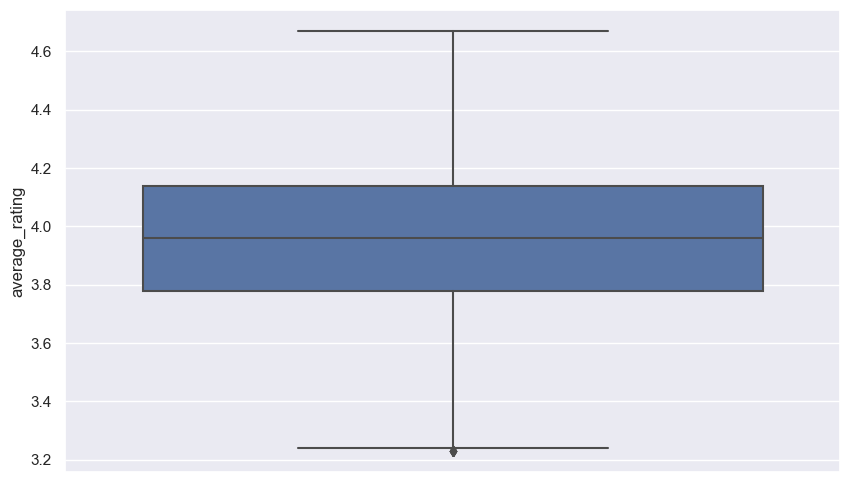

In [307]:
sns.boxplot(y = 'average_rating', data=data)

<Axes: ylabel='num_pages'>

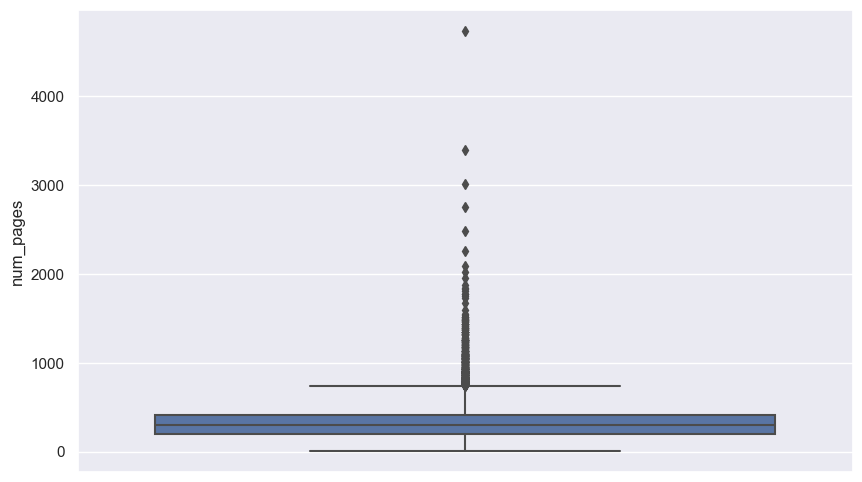

In [308]:
sns.boxplot(y = 'num_pages', data=data)

# 3. Exploratory analysis and plots of relevant attributes

- Look at the size
- find our target variable: average rating
- management of missing values: no missing values
- Visualization of the target variable
- Meaning of variables
- Relationship between variables and target

## Table caracteristics

In [309]:
# Get information on columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10693 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10693 non-null  int64  
 1   title               10693 non-null  object 
 2   authors             10693 non-null  object 
 3   average_rating      10693 non-null  float64
 4   isbn                10693 non-null  object 
 5   isbn13              10693 non-null  int64  
 6   language_code       10693 non-null  object 
 7   num_pages           10693 non-null  int64  
 8   ratings_count       10693 non-null  int64  
 9   text_reviews_count  10693 non-null  int64  
 10  publication_date    10693 non-null  object 
 11  publisher           10693 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [310]:
# Print lines and colums count
np.shape(data)

(10693, 12)

In [311]:
# Print columns titles
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [312]:
# Print table caracteristics
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10693.000000,10693.000000,1.069300e+04,10693.000000,1.069300e+04,10693.000000
mean,21264.750210,3.954457,9.759939e+12,342.597961,1.860887e+04,560.693538
std,13096.781613,0.261420,4.419068e+11,228.419456,1.146828e+05,2625.178164
min,1.000000,3.230000,8.987060e+09,10.000000,0.000000e+00,0.000000
25%,10206.000000,3.780000,9.780345e+12,202.000000,1.230000e+02,10.000000
50%,20174.000000,3.960000,9.780571e+12,304.000000,8.240000e+02,50.000000
75%,32078.000000,4.140000,9.780871e+12,419.000000,5.355000e+03,250.000000
max,45641.000000,4.670000,9.790008e+12,4736.000000,4.597666e+06,94265.000000


In [313]:
#Print data types
data.dtypes.value_counts()

object     6
int64      5
float64    1
Name: count, dtype: int64

In [314]:
data.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


## Data normalization

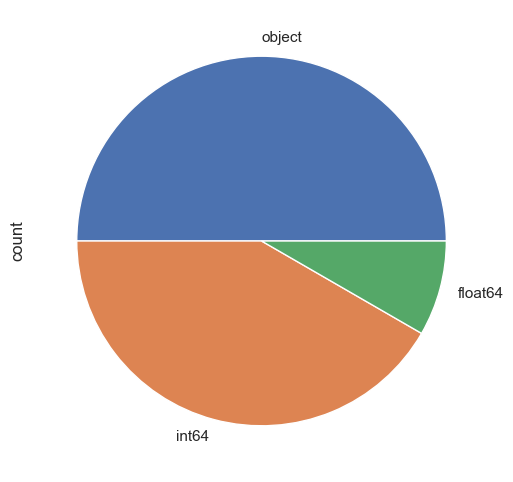

In [315]:
data.dtypes.value_counts().plot.pie();

In [316]:
dat_ch = data.select_dtypes('object')
dat_ch

,title,authors,isbn,language_code,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,eng,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,eng,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,eng,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,eng,5/1/2004,Scholastic Inc.
5,Unauthorized Harry Potter Book Seven News: Hal...,W. Frederick Zimmerman,0976540606,en-US,4/26/2005,Nimble Books
...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,eng,12/21/2004,Da Capo Press
11123,You Bright and Risen Angels,William T. Vollmann,0140110879,eng,12/1/1988,Penguin Books
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,eng,8/1/1993,Penguin Books
11125,Poor People,William T. Vollmann,0060878827,eng,2/27/2007,Ecco


In order to be able to process date data, we convert it from string to numeric

In [317]:
# Changing date type from string to numeric
temp = data.publication_date
data = data.drop(columns=["publication_date"])
data = pd.concat([data,pd.to_numeric(pd.to_datetime(temp, format='%m/%d/%Y'))],axis=1)

In [318]:
dat_int = data.select_dtypes('int64')
# We drop every random generated colums that can't be useful in order to better see the colors on the graph
dat_int = dat_int.drop(columns=["bookID","isbn13"])
dat_int

,num_pages,ratings_count,text_reviews_count,publication_date
0,652,2095690,27591,1158364800000000000
1,870,2153167,29221,1093996800000000000
2,352,6333,244,1067644800000000000
3,435,2339585,36325,1083369600000000000
5,152,19,1,1114473600000000000
...,...,...,...,...
11122,512,156,20,1103587200000000000
11123,635,783,56,596937600000000000
11124,415,820,95,744163200000000000
11125,434,769,139,1172534400000000000


In [319]:
dat_float = data.select_dtypes('float')
dat_float

,average_rating
0,4.57
1,4.49
2,4.42
3,4.56
5,3.74
...,...
11122,4.06
11123,4.08
11124,3.96
11125,3.72


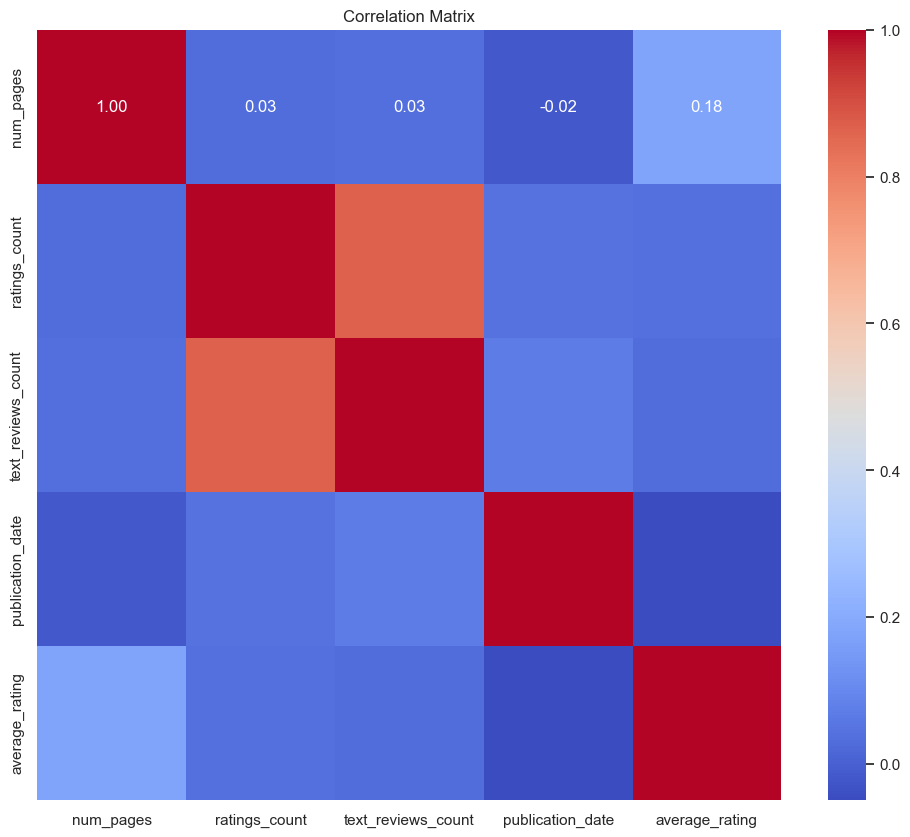

In [320]:
dat_int_float = pd.concat([dat_int, dat_float], axis=1) #data.select_dtypes('int64','float')
correlation_matrix = dat_int_float.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


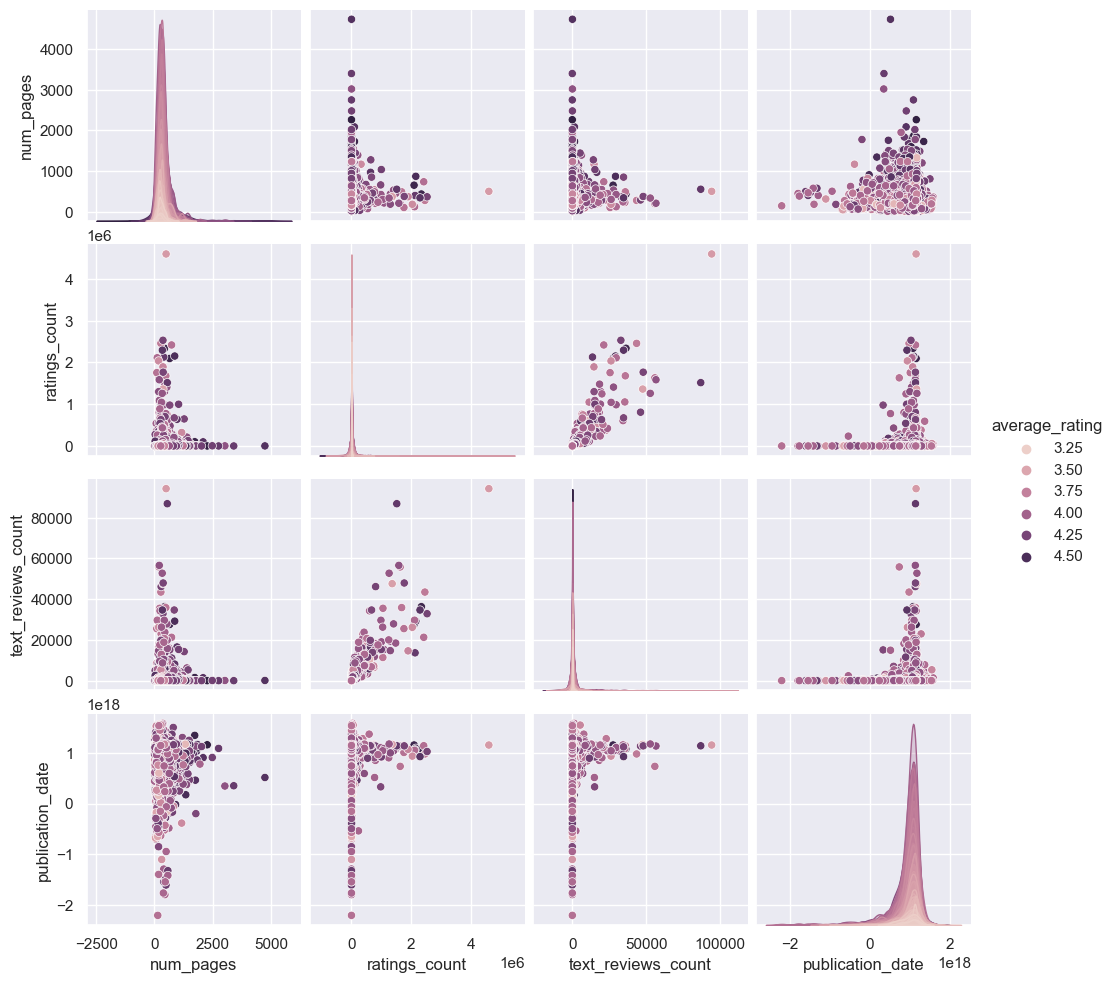

In [321]:
sns.pairplot(pd.concat([dat_int, dat_float], axis=1), hue='average_rating')

<Axes: xlabel='num_pages', ylabel='average_rating'>

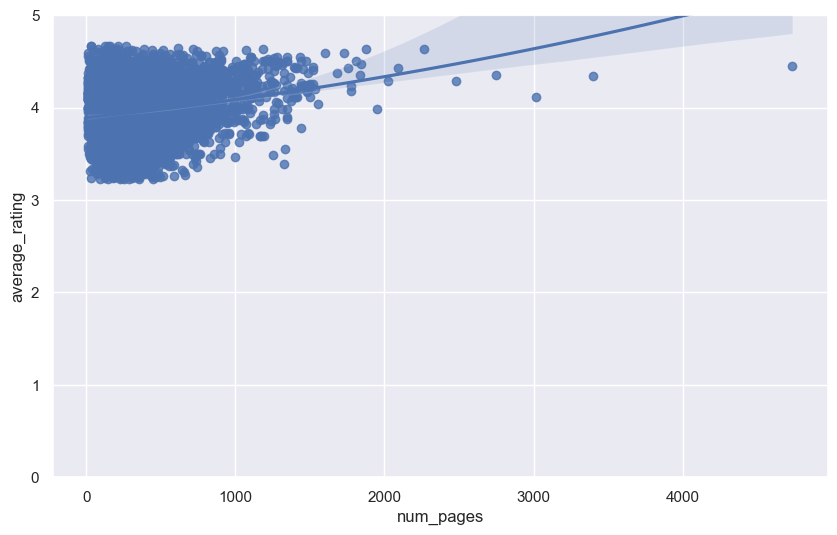

In [322]:
plt.ylim(0, 5)
sns.regplot(data=data, x="num_pages", y="average_rating", order=2)

<Axes: xlabel='ratings_count', ylabel='average_rating'>

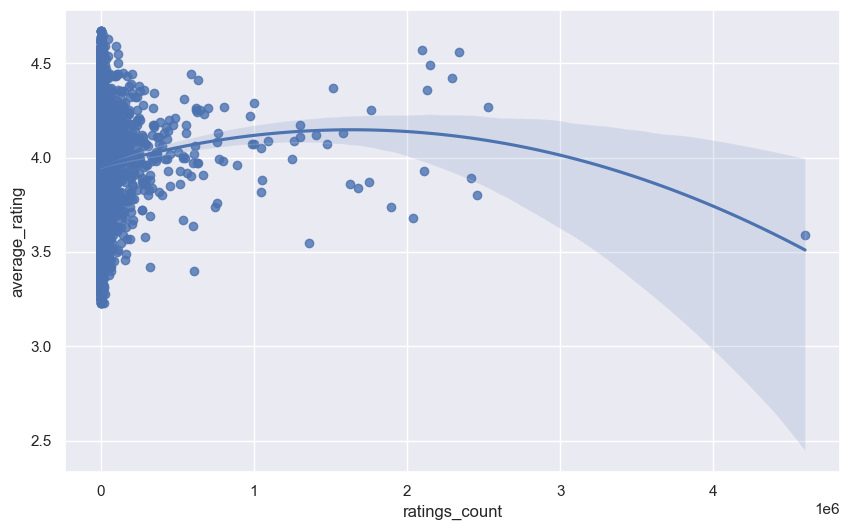

In [323]:
sns.regplot(data=data, x="ratings_count", y="average_rating", order=2)

<Axes: xlabel='text_reviews_count', ylabel='average_rating'>

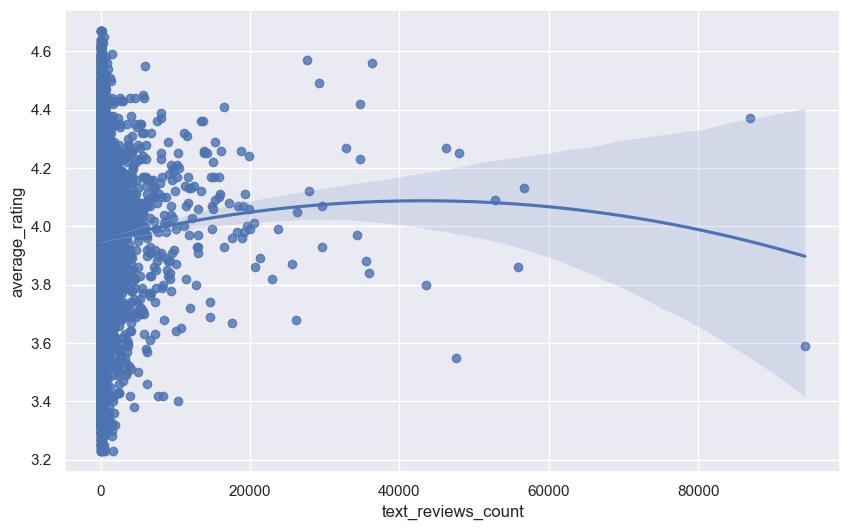

In [324]:
sns.regplot(data=data, x="text_reviews_count", y="average_rating", order=2)

<Axes: xlabel='publication_date', ylabel='average_rating'>

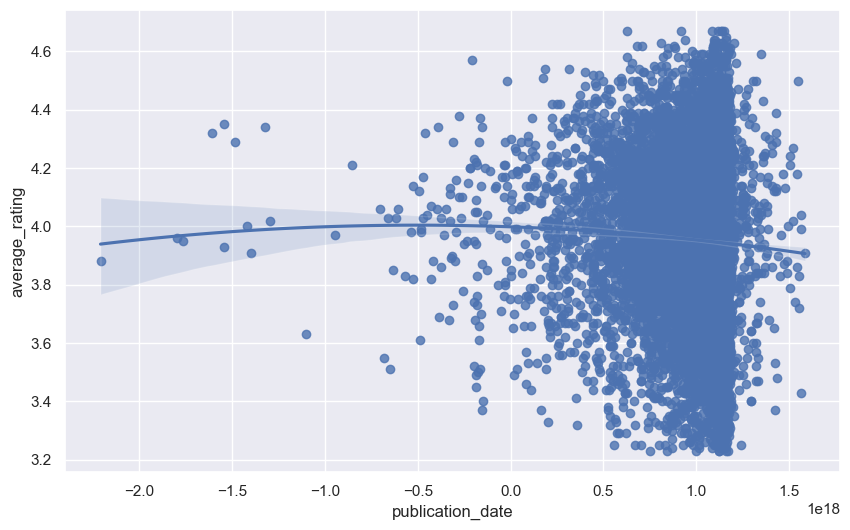

In [325]:
sns.regplot(data=data, x="publication_date", y="average_rating", order=2)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

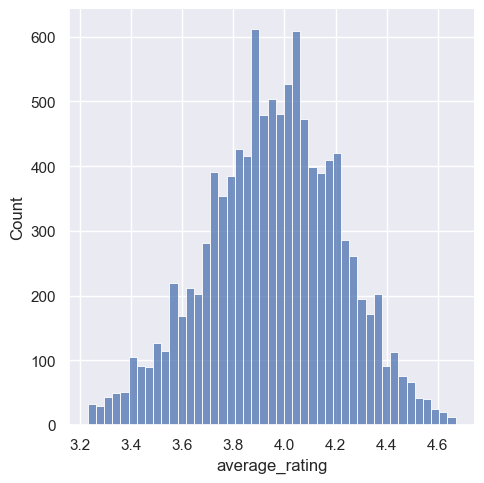

In [326]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.displot(data[col])

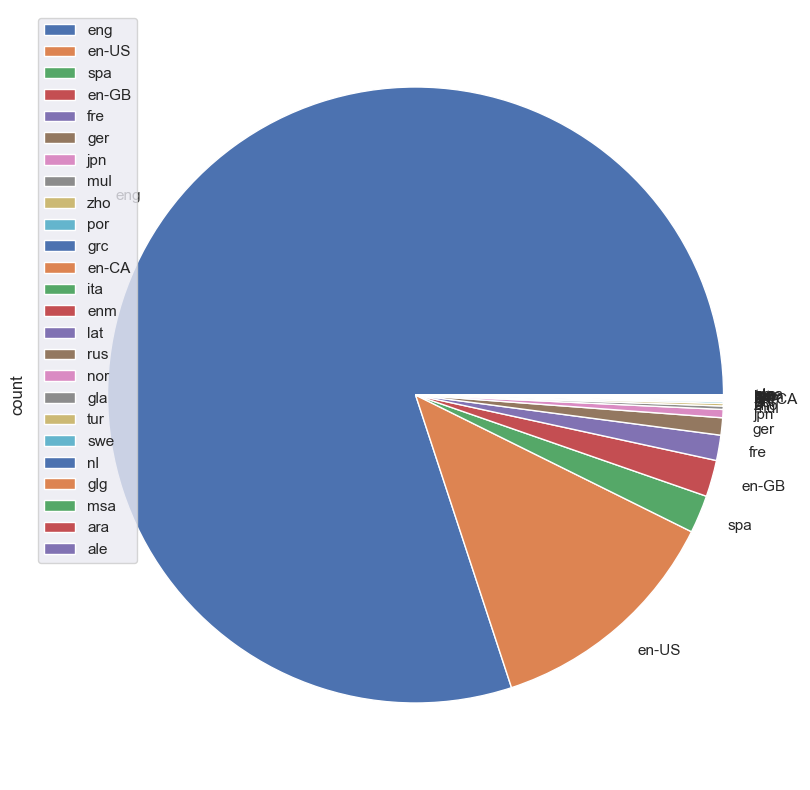

In [327]:
data['language_code'].value_counts().plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

We can keep English and bring the other languages together to study the impact of the English language on the rating of books.
Here we choose to keep all the languages because it is an interesting variable which allows us to train the algorithm.

# 4. Feature selection

## Quantitative variables

We drop every random generated columns (bookID, isbn, isbn13) because they can't help us to predict average_rating due to their ramdomness.
The title can't be handled in a machine learning algorithm too so we have to drop it.
We drop every qualitative values because we process it in the next step.

We use the next columns :
- num_pages: because we saw in the correlation matrix that it is directly correlated with average_rating
- ratings_count: this criterion allows you to know the enthusiasm surrounding a book. If the book was divisive, this does not predict its rating but in the other case, it is a good indicator. the correlation matrix shows it is moderately correlated with average_rating
- text_reviews_count: same reason as ratings_count but the reader felt the need to comment. This is usually a sign that he either loved or hated the book.
- publication_date: users may have been more or less critical about the books depending on the date and we can imagine that certain books which appeared at the launch of the website may have received fewer ratings than certain books published later. This results in ratings that are less reliable or may have been given by more knowledgeable and therefore more critical readers. It is therefore an interesting criterion. Other ancient authors like Jules Vernes were able to receive notes which arrived on the site in a more constant manner with results on the note which are to be studied. The correlation matrix shows it is not correlated with average_rating and this is normal. But it is correlated with text_reviews_count. Using both publication_date and text_reviews_count may help an algorithm to better predict average_rating.

In [328]:
df_processed = data.drop(columns=["bookID","authors","title","isbn","isbn13","language_code","publisher"])

In [329]:
from sklearn.model_selection import train_test_split
# split 80% of the data to the training set and 20% of the data to test set
df_train, df_test = train_test_split(df_processed,test_size = 0.2)

In [330]:
print("Total lines=",len(df_processed),", train lines=",len(df_train),", test lines=",len(df_test))

Total lines= 10693 , train lines= 8554 , test lines= 2139


In [331]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
2627,4.07,162,308,28,1340236800000000000
793,3.98,234,4600,88,1002672000000000000
6835,4.18,320,2040,150,591667200000000000
2248,4.67,32,2,0,624326400000000000
10643,4.14,416,211,16,988848000000000000
...,...,...,...,...,...
5498,3.36,139,28,0,901929600000000000
6920,4.04,288,18289,614,1155686400000000000
5680,3.85,192,91,9,927504000000000000
2160,3.67,72,3,0,333590400000000000


In [332]:
# Sample distribution test
print(df_processed['num_pages'].mean())
print(df_train['num_pages'].mean())
print(df_test['num_pages'].mean())

342.5979612830824
343.06488192658406
340.7307152875175


In [333]:
print(df_processed['average_rating'].mean())
print(df_train['average_rating'].mean())
print(df_test['average_rating'].mean())

3.9544571214813433
3.9545206920738836
3.954202898550724


In [334]:
df_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date'],
      dtype='object')

In [335]:
# Prepare train model values
X_train = df_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count','publication_date']].values
y_train = df_train.average_rating.values

In [336]:
X_train

array([[                162,                 308,                  28,
        1340236800000000000],
       [                234,                4600,                  88,
        1002672000000000000],
       [                320,                2040,                 150,
         591667200000000000],
       ...,
       [                192,                  91,                   9,
         927504000000000000],
       [                 72,                   3,                   0,
         333590400000000000],
       [                464,                 954,                  63,
         845942400000000000]], dtype=int64)

In [337]:
# Prepare test model values
X_test = df_test.loc[:,['num_pages', 'ratings_count', 'text_reviews_count','publication_date']].values
y_test = df_test.average_rating.values

In [338]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train)

y_test_predicted = lr_model.predict(X_test)

Comparison between real values of average_rating and predicted values

In [339]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

    Real  Predicted  difference
0   4.32   3.909479    0.410521
1   3.69   3.939834   -0.249834
2   4.18   3.948616    0.231384
3   3.85   3.921687   -0.071687
4   4.11   3.895689    0.214311
5   4.06   3.926971    0.133029
6   3.79   3.904476   -0.114476
7   3.94   3.964338   -0.024338
8   4.30   3.902956    0.397044
9   3.98   3.974875    0.005125
10  4.51   3.957125    0.552875
11  4.15   3.954401    0.195599
12  3.60   3.935998   -0.335998
13  4.03   3.961604    0.068396
14  3.94   3.929753    0.010247


Statistical measurements

In [340]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_test_predicted)
print("Mean Squared Error:", mse,",R²=",r2_score(y_test, y_test_predicted))

Mean Squared Error: 0.06965963249849777 ,R²= 0.03392726466140761



## Qualitative variables

<Axes: xlabel='language_code', ylabel='average_rating'>

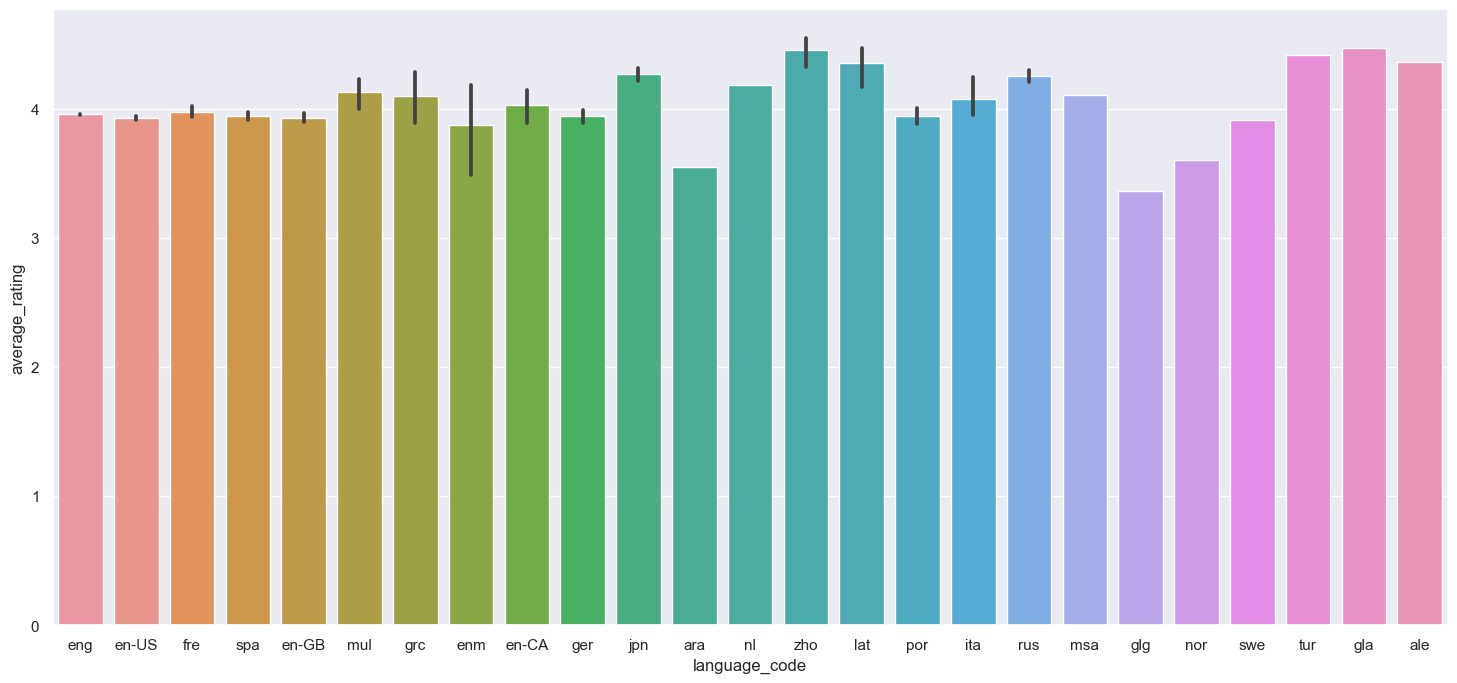

In [341]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(data, x="language_code", y="average_rating")

We drop the publisher column because it is very hard to process: there are many duplicates publisher with different names like "Avery" and "Avery Publishing Group". But it should be a very interresting input because there is someone from the publisher who has read the book and who has judged its quality to sell it or not. The sale by a publishing house means that they have bet on this book to sell well. Some publisher may wants quality or just quantity. We can therefore say that a publisher should normally be well rated by critics or not.

We add the next columns :
- authors: They are important because some authors will be preferred and some people will give the book good ratings because the book was written by their favorite author while they would have given a lower rating to someone else. So some books of an author can be "bad" without having a big loss of average_rating. The next figure shows huge differences between authors in their received average_rating.
- language_code: The language of the book is very important because it reflects the reader's culture and part of their personality. There may be differences in the way of criticizing or promoting the work of an author depending on the culture. We can see very clearly in the previous graph that Turkish people seem to give good marks to books on average and French people give bad marks.
We have chosen to differentiate between English languages because they reflect this cultural change. We see in the graph that the differences in ratings exist between the English even if they are rather small.

In [342]:
from sklearn.model_selection import train_test_split
df_processed2 = data.drop(columns=["bookID","title","isbn","isbn13","publisher"])

Encoding language column

In [343]:
df_processed2 = pd.concat([df_processed2,pd.get_dummies(df_processed2.language_code)],axis=1).drop(columns="language_code")
df_processed2

,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,ale,ara,en-CA,en-GB,...,msa,mul,nl,nor,por,rus,spa,swe,tur,zho
0,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,1158364800000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,1093996800000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,J.K. Rowling,4.42,352,6333,244,1067644800000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,1083369600000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,W. Frederick Zimmerman,3.74,152,19,1,1114473600000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,William T. Vollmann/Larry McCaffery/Michael He...,4.06,512,156,20,1103587200000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11123,William T. Vollmann,4.08,635,783,56,596937600000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11124,William T. Vollmann,3.96,415,820,95,744163200000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11125,William T. Vollmann,3.72,434,769,139,1172534400000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Encoding authors column

In [344]:
def trad_from_authors(authors):
    return authors.split("/")[0]

In [345]:
temp = df_processed2.authors
df_processed2 = df_processed2.drop(columns=["authors"])
df_processed2 = pd.concat([df_processed2,temp.apply(trad_from_authors)],axis=1)
df_processed2.rename(columns = {'authors':'FirstAuthor'},inplace = True)

<Axes: xlabel='FirstAuthor', ylabel='average_rating'>

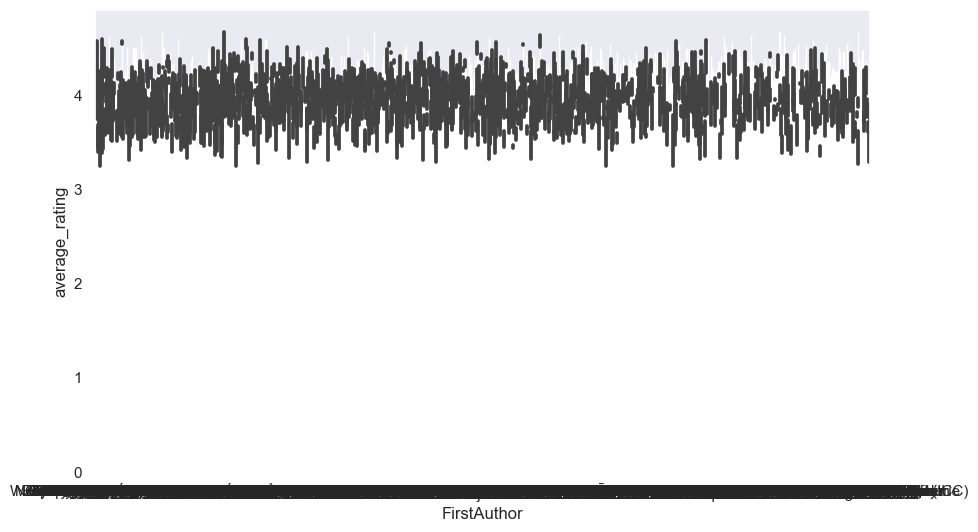

In [346]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(df_processed2, x="FirstAuthor", y="average_rating")

In [347]:
df_processed2 = pd.concat([df_processed2,pd.get_dummies(df_processed2.FirstAuthor)],axis=1)
df_processed2

df_processed2 = df_processed2.drop(columns=["FirstAuthor"])

In [348]:
df_train, df_test = train_test_split(df_processed2,test_size = 0.2)

In [349]:
print("Total lines=",len(df_processed2),", train lines=",len(df_train),", test lines=",len(df_test))

Total lines= 10693 , train lines= 8554 , test lines= 2139


In [350]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,ale,ara,en-CA,en-GB,en-US,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
1739,3.91,464,349,44,909187200000000000,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10035,3.75,160,6313,233,521510400000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
228,4.08,32,1773,274,1112313600000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179,4.01,776,29764,2164,1162252800000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1892,4.03,311,7,0,1049673600000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,3.62,192,12,1,560044800000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10015,3.83,344,12363,278,1082332800000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1093,3.97,180,37620,2298,1093910400000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9660,3.33,192,120,1,1005609600000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [351]:
print(df_processed2.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9544571214813433
3.954175824175824
3.9555820476858354


In [352]:
print(df_processed2.eng.mean())
print(df_train.eng.mean())
print(df_test.eng.mean())

0.8004301879734406
0.8027823240589198
0.791023842917251


In [353]:
df_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'ale', 'ara', 'en-CA', 'en-GB', 'en-US',
       ...
       'Zak Smith', 'Zecharia Sitchin', 'Zilpha Keatley Snyder', 'Zolar',
       'Zora Neale Hurston', 'Zoë Heller', 'bell hooks', 'Åsne Seierstad',
       'Émile Zola', 'Éric-Emmanuel Schmitt'],
      dtype='object', length=4115)

In [354]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8554 entries, 1739 to 8917
Columns: 4115 entries, average_rating to Éric-Emmanuel Schmitt
dtypes: bool(4110), float64(1), int64(4)
memory usage: 33.9 MB


In [355]:
y_train = df_train.average_rating

df_train = df_train.drop(columns=["average_rating"])
X_train = df_train.values

In [356]:
df_train

,num_pages,ratings_count,text_reviews_count,publication_date,ale,ara,en-CA,en-GB,en-US,eng,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
1739,464,349,44,909187200000000000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10035,160,6313,233,521510400000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
228,32,1773,274,1112313600000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
179,776,29764,2164,1162252800000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1892,311,7,0,1049673600000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,192,12,1,560044800000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10015,344,12363,278,1082332800000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1093,180,37620,2298,1093910400000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9660,192,120,1,1005609600000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [357]:
y_test = df_test.average_rating

df_test = df_test.drop(columns=["average_rating"])
X_test = df_test.values

In [358]:
# Training the LinearRegression model
from sklearn.linear_model import LinearRegression

# here we initialize the model
lr_model = LinearRegression().fit(X_train, y_train)

y_test_predicted = lr_model.predict(X_test)

In [359]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

from sklearn.metrics import r2_score,mean_squared_error
mseLinearRegression = mean_squared_error(y_test, y_test_predicted)
R2LinearRegression = r2_score(y_test, y_test_predicted)
print("Mean Squared Error:", mseLinearRegression,",R²=",R2LinearRegression)

    Real  Predicted  difference
0   4.23   3.872859    0.357141
1   3.97   3.924866    0.045134
2   3.97   3.906613    0.063387
3   3.75   3.947643   -0.197643
4   4.21   4.177039    0.032961
5   3.83   3.965060   -0.135060
6   4.13   3.935561    0.194439
7   3.97   3.938361    0.031639
8   3.72   3.948618   -0.228618
9   3.87   3.905417   -0.035417
10  3.33   3.943013   -0.613013
11  4.05   4.002875    0.047125
12  3.92   3.989410   -0.069410
13  3.47   3.881802   -0.411802
14  3.83   3.929988   -0.099988
Mean Squared Error: 0.0672539176942333 ,R²= 0.0366494265834969


# 5. Models comparison

We use some models that are compatible with a variable like average_rating that is linear and not a category.
- LinearRegression: the classic one that we use as a base comparison
- GradientBoostingRegressor: it is one of the most popular machine learning algorithms and this why we have to try it.
- RandomForestRegressor: it be useful with our datas because we have intercorrlated colums and using tree decisions with these informations should have better results than other algorithms.
- KNeighborsRegressor: we have a lot of training data and using nearest neighbors of our known training points could be efficient to predict the test data. This algorith can use the hard correlation between ratings_count and text_reviews_count but it will suffer from the lack of correlation with average_rating of it.

In [360]:
# Training the GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor

lr_model = GradientBoostingRegressor(random_state=0)
lr_model.fit(X_train, y_train)

GBR_y_test_predicted = lr_model.predict(X_test)

In [361]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': GBR_y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

mseGradientBoostingRegressor = mean_squared_error(y_test, GBR_y_test_predicted)
R2GradientBoostingRegressor = r2_score(y_test, GBR_y_test_predicted)
print("Mean Squared Error:", mseGradientBoostingRegressor,",R²=",R2GradientBoostingRegressor)

    Real  Predicted  difference
0   4.23   3.982898    0.247102
1   3.97   3.902387    0.067613
2   3.97   3.910088    0.059912
3   3.75   3.900475   -0.150475
4   4.21   4.182916    0.027084
5   3.83   3.954857   -0.124857
6   4.13   3.904673    0.225327
7   3.97   3.928944    0.041056
8   3.72   3.915384   -0.195384
9   3.87   3.917006   -0.047006
10  3.33   3.922386   -0.592386
11  4.05   3.972722    0.077278
12  3.92   3.949043   -0.029043
13  3.47   3.997386   -0.527386
14  3.83   3.909306   -0.079306
Mean Squared Error: 0.05922533682884795 ,R²= 0.15165147026448422


In [362]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RFR_y_test_predicted = rf.predict(X_test)

In [363]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': RFR_y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

mseRandomForestRegressor = mean_squared_error(y_test, RFR_y_test_predicted)
R2RandomForestRegressor = r2_score(y_test, RFR_y_test_predicted)
print("Mean Squared Error:", mseRandomForestRegressor,",R²=",R2RandomForestRegressor)

    Real  Predicted  difference
0   4.23      3.856       0.374
1   3.97      3.864       0.106
2   3.97      4.097      -0.127
3   3.75      3.853      -0.103
4   4.21      4.209       0.001
5   3.83      3.969      -0.139
6   4.13      3.752       0.378
7   3.97      3.955       0.015
8   3.72      3.766      -0.046
9   3.87      3.959      -0.089
10  3.33      3.816      -0.486
11  4.05      4.141      -0.091
12  3.92      3.746       0.174
13  3.47      4.116      -0.646
14  3.83      3.923      -0.093
Mean Squared Error: 0.060023240299205236 ,R²= 0.14022223622053764


In [364]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNR_y_test_predicted = knn.predict(X_test)

In [365]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': KNR_y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(print(Comparison.head(15)))

mseKNeighborsRegressor = mean_squared_error(y_test, KNR_y_test_predicted)
R2KNeighborsRegressor = r2_score(y_test, KNR_y_test_predicted)
print("Mean Squared Error:", mseKNeighborsRegressor,",R²=",R2KNeighborsRegressor)

    Real  Predicted  difference
0   4.23      3.900       0.330
1   3.97      4.124      -0.154
2   3.97      4.046      -0.076
3   3.75      3.916      -0.166
4   4.21      4.114       0.096
5   3.83      3.994      -0.164
6   4.13      3.926       0.204
7   3.97      4.040      -0.070
8   3.72      3.926      -0.206
9   3.87      3.942      -0.072
10  3.33      3.840      -0.510
11  4.05      3.986       0.064
12  3.92      4.040      -0.120
13  3.47      4.226      -0.756
14  3.83      3.936      -0.106
None
Mean Squared Error: 0.08141220383356708 ,R²= -0.16615501274943467


[Text(0.5, 1.0, 'MSE comparison')]

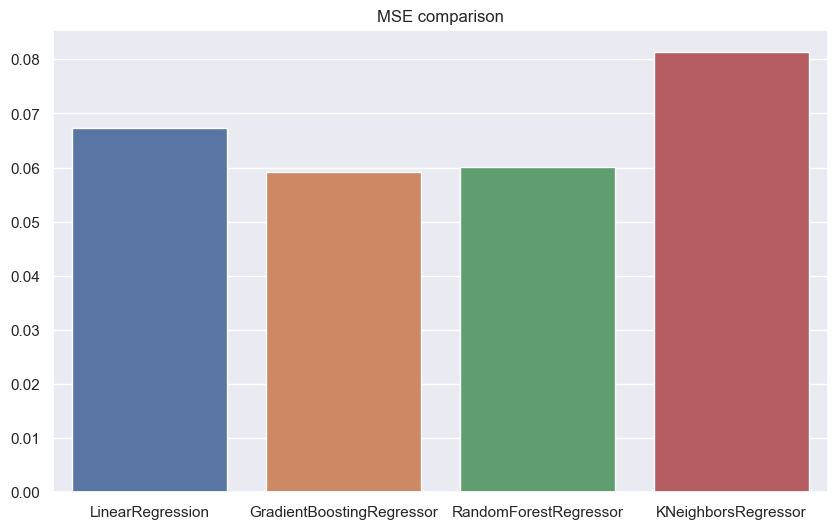

In [366]:
results = pd.DataFrame([[mseLinearRegression,mseGradientBoostingRegressor,mseRandomForestRegressor,mseKNeighborsRegressor]],index=['models'],
                  columns=['LinearRegression','GradientBoostingRegressor','RandomForestRegressor','KNeighborsRegressor'])
sns.barplot(results).set(title="MSE comparison")

[Text(0.5, 1.0, 'R² comparison')]

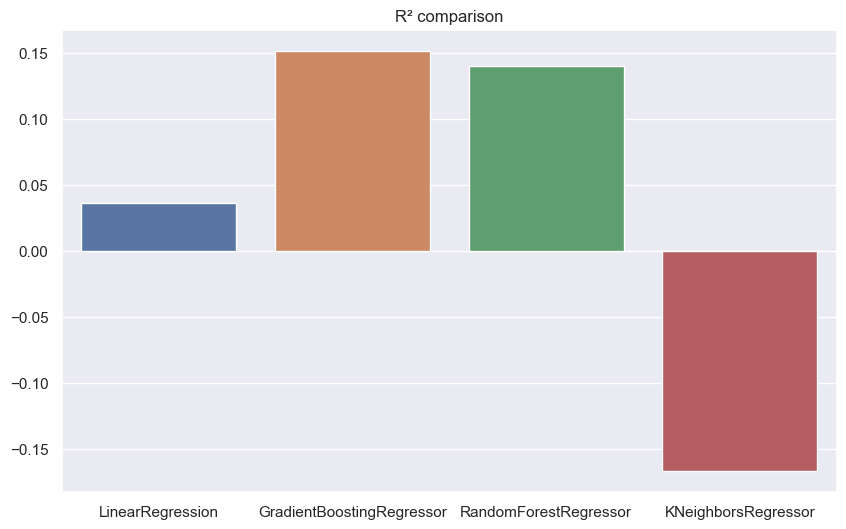

In [367]:
results = pd.DataFrame([[R2LinearRegression,R2GradientBoostingRegressor,R2RandomForestRegressor,R2KNeighborsRegressor]],index=['models'],
                  columns=['LinearRegression','GradientBoostingRegressor','RandomForestRegressor','KNeighborsRegressor'])
sns.barplot(results).set(title="R² comparison")